In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_science_job.csv to data_science_job.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data_science_job.csv']))

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
# calculate the percentage for each column how many values are missing
# missing values less than 5% we can exxlude
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
# list all the columns having less thena 5% values missing
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [ ]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9181,0.910,no_enrollment,Graduate,20.0,66.0
1689,0.897,no_enrollment,Masters,4.0,NaN
12576,0.884,no_enrollment,Graduate,5.0,80.0
16826,0.910,no_enrollment,Graduate,6.0,8.0
14716,0.624,Full time course,High School,0.0,44.0


In [ ]:
# now let's check if we drop all the columns having missing valus how many columns we left with
(len(df[cols].dropna())/len(df))

# we will be left with the 89 percent data so we can poceed to drop the column

0.8968577095730244

In [ ]:
# create new dataframe
new_df = df[cols].dropna()

new_df.shape , df.shape

((17182, 5), (19158, 13))

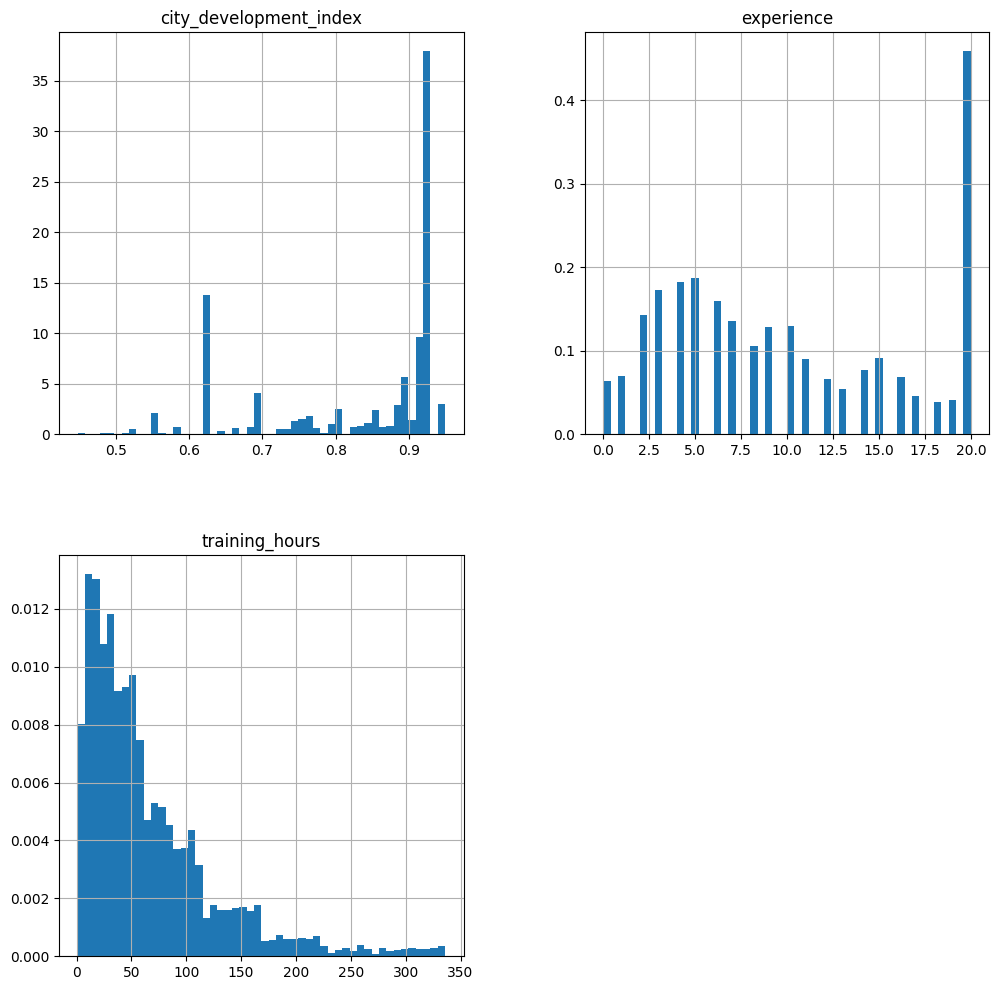

In [ ]:
# plot the garph to see the distribuiton of the data
new_df.hist(bins=50 , density =True , figsize=(12,12))
plt.show()

<Axes: >

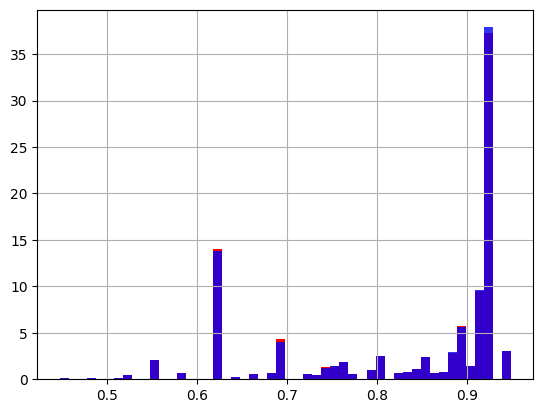

In [ ]:
# now we have to check the original and the after dropping distributon of the data

fig = plt.figure()
ax= fig.add_subplot(111)

df['city_development_index'].hist(bins=50 ,ax=ax, density = True   ,color="red")

new_df['city_development_index'].hist(bins=50 ,ax=ax, density = True   ,color="blue" ,alpha =0.8)


<Axes: >

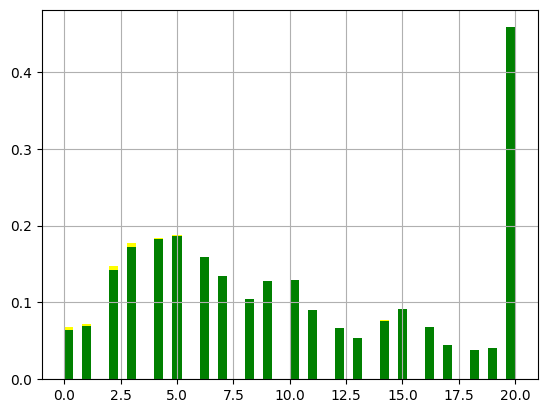

In [ ]:
fig  = plt.figure()
ax  = fig.add_subplot(111)

df['experience'].hist(bins=50 , density = True , ax =ax , color = 'yellow')

new_df['experience'].hist(bins =50 , density =True , ax =ax , color = 'green')

<Axes: >

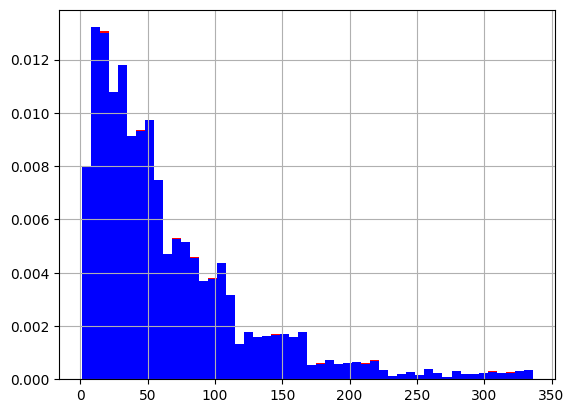

In [ ]:
# for
fig  = plt.figure()
ax  = fig.add_subplot(111)

df['training_hours'].hist(bins=50 , density = True , ax =ax , color = 'red')

new_df['training_hours'].hist(bins =50 , density =True , ax =ax , color = 'blue')

In [ ]:
# now compare the orinal and the data after value drop
temp = pd.concat([
    df['enrolled_university'].value_counts()/len(df),

    new_df['enrolled_university'].value_counts()/len(new_df)],
    axis=1
)

temp.columns =['original','CCA']

In [ ]:
temp

,original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


## Conclusion : The above raton distribtuin is not quit big difference so we can apply the CCA on those columns
